<a href="https://colab.research.google.com/github/zuhaibai123/Logistic-regression/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl

In [ ]:
df=pd.read_csv("/content/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


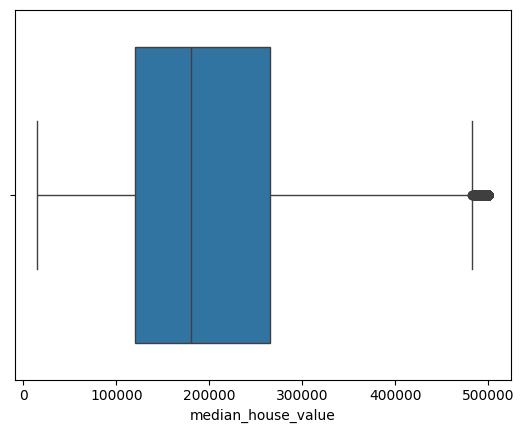

In [ ]:
sns.boxplot(x=df["median_house_value"])
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


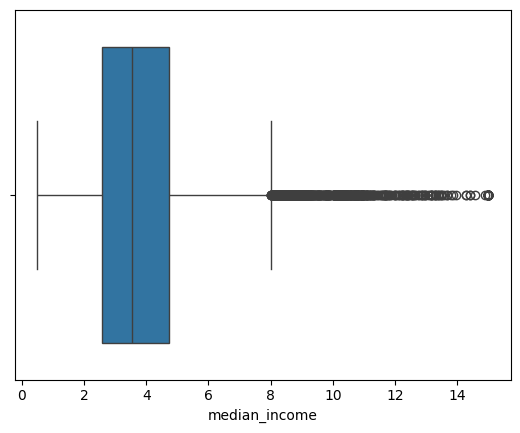

In [ ]:
sns.boxplot(x=df["median_income"])
plt.show()

In [ ]:
def cat_income(income):
  cat_of_in=["low","medium","high"]

  if income >=4:
    return cat_of_in[0]

  elif income>=8:
    return cat_of_in[1]

  else:
    return cat_of_in[2]

df["median_income"] =df["median_income"].apply(cat_income)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  object 
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(3), int64(5), object(2)
memory usage: 1.6+ MB


In [ ]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
df.drop(["ocean_proximity"],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  object 
 8   median_house_value  20433 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 1.6+ MB


In [ ]:
df.drop(["longitude","latitude"],inplace=True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  20433 non-null  int64  
 1   total_rooms         20433 non-null  int64  
 2   total_bedrooms      20433 non-null  float64
 3   population          20433 non-null  int64  
 4   households          20433 non-null  int64  
 5   median_income       20433 non-null  object 
 6   median_house_value  20433 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.2+ MB


In [ ]:
df.drop(["total_bedrooms"],inplace=True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   housing_median_age  20433 non-null  int64 
 1   total_rooms         20433 non-null  int64 
 2   population          20433 non-null  int64 
 3   households          20433 non-null  int64 
 4   median_income       20433 non-null  object
 5   median_house_value  20433 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


In [ ]:
df["median_income"]=df["median_income"].astype("category")

In [ ]:
income=pd.get_dummies(df["median_income"],drop_first=True)
print(income)

         low
0       True
1       True
2       True
3       True
4      False
...      ...
20635  False
20636  False
20637  False
20638  False
20639  False

[20433 rows x 1 columns]


In [ ]:
df=pd.concat([income,df],axis=1)

In [ ]:
df.head()

,low,housing_median_age,total_rooms,population,households,median_income,median_house_value
0,True,41,880,322,126,low,452600
1,True,21,7099,2401,1138,low,358500
2,True,52,1467,496,177,low,352100
3,True,52,1274,558,219,low,341300
4,False,52,1627,565,259,high,342200


In [ ]:
df.drop(["median_income"],axis=1,inplace=True)

In [ ]:
df.head()

,low,housing_median_age,total_rooms,population,households,median_house_value
0,True,41,880,322,126,452600
1,True,21,7099,2401,1138,358500
2,True,52,1467,496,177,352100
3,True,52,1274,558,219,341300
4,False,52,1627,565,259,342200


In [ ]:
x=df.drop(["low"],axis=1)
y=df["low"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=106)

In [ ]:
from sklearn.linear_model import LogisticRegression
ireg=LogisticRegression()
ireg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_lreg = ireg.predict(x_test)
print(y_pred_lreg)

[ True  True  True ... False False  True]


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print('Classification Model')
# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, y_pred_lreg) * 100,2)
print('Accuracy', logreg_accuracy,'%')

Classification Model
--------------------------------------------------------------------------------
Accuracy 81.26 %
